<a href="https://colab.research.google.com/github/ramjitampan/pyton_Ramzy/blob/main/Tugas3_Coding1_CitraDigital.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

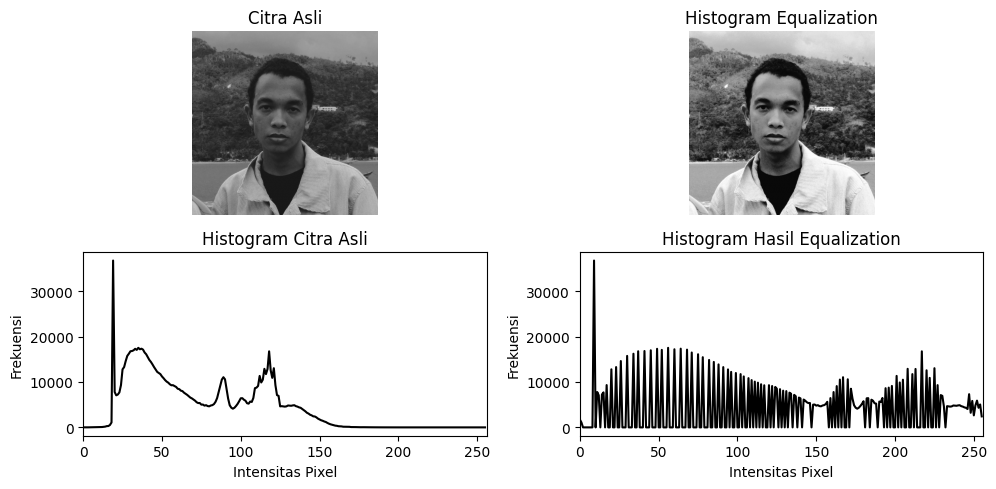

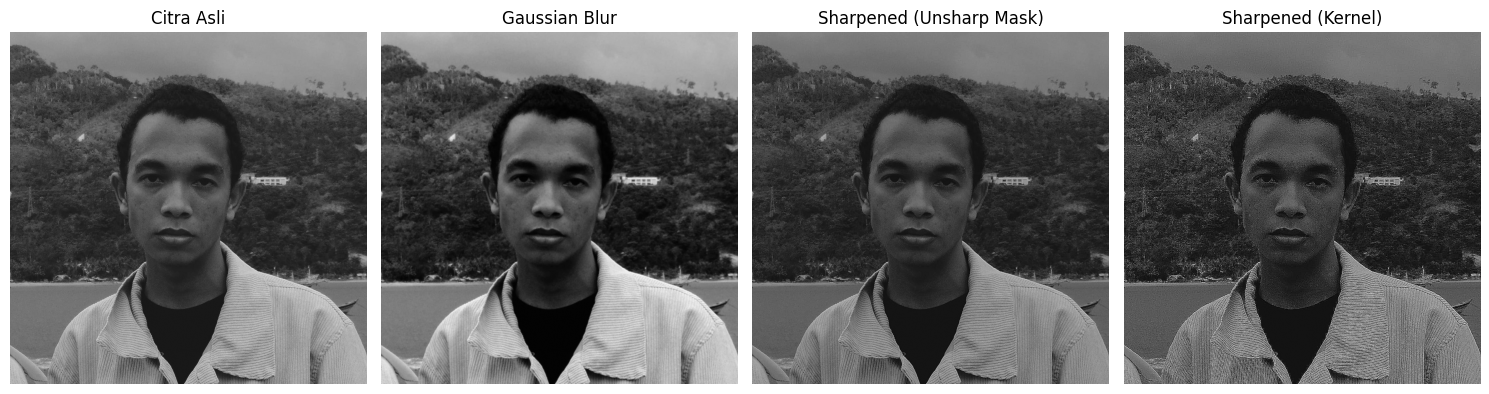

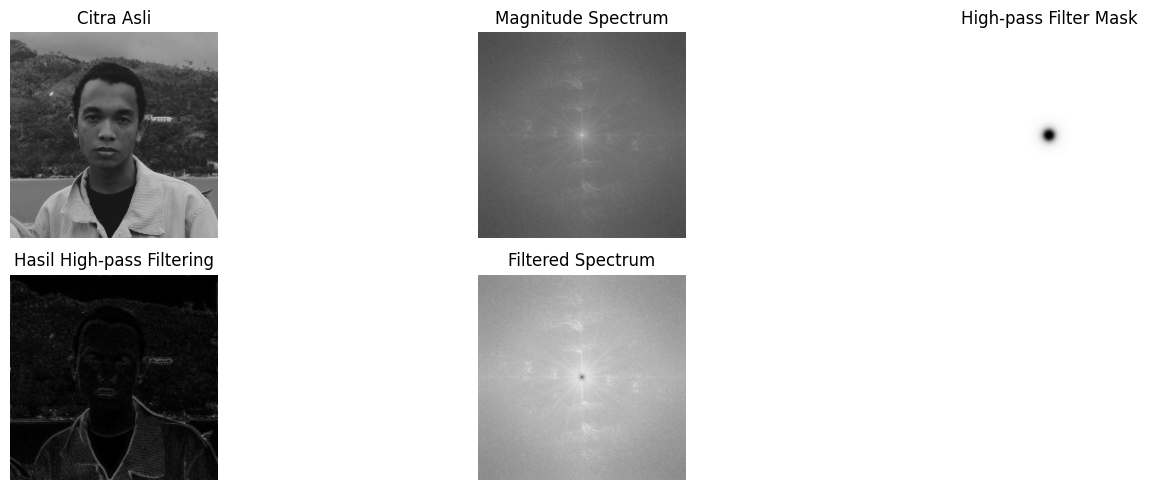

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# ==========================
# Lab 1: Histogram Equalization
# ==========================
# Load citra grayscale dengan penanganan error
img_path = '/content/agil.jpg'
img = cv2.imread(img_path, 0)

# Periksa apakah gambar berhasil dimuat
if img is None:
    raise ValueError(f"Gambar tidak dapat dimuat dari path: {img_path}")

# Histogram Equalization
equ = cv2.equalizeHist(img)

# Hitung histogram untuk citra asli dan hasil equalization
hist_original = cv2.calcHist([img], [0], None, [256], [0, 256])
hist_equalized = cv2.calcHist([equ], [0], None, [256], [0, 256])

# Tampilkan hasil
plt.figure(figsize=(15, 5))

# Citra asli
plt.subplot(2, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Citra Asli')
plt.axis('off')

# Histogram citra asli
plt.subplot(2, 3, 4)
plt.plot(hist_original, color='black')
plt.title('Histogram Citra Asli')
plt.xlim([0, 256])
plt.xlabel('Intensitas Pixel')
plt.ylabel('Frekuensi')

# Hasil equalization
plt.subplot(2, 3, 2)
plt.imshow(equ, cmap='gray')
plt.title('Histogram Equalization')
plt.axis('off')

# Histogram hasil equalization
plt.subplot(2, 3, 5)
plt.plot(hist_equalized, color='black')
plt.title('Histogram Hasil Equalization')
plt.xlim([0, 256])
plt.xlabel('Intensitas Pixel')
plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()

# ==========================
# Lab 2: Filtering (Smoothing & Sharpening)
# ==========================
# Gaussian Smoothing
gaussian = cv2.GaussianBlur(img, (5, 5), 0)

# Sharpening dengan filter unsharp masking (lebih efektif)
gaussian_blur = cv2.GaussianBlur(img, (9, 9), 0)
sharpened = cv2.addWeighted(img, 1.5, gaussian_blur, -0.5, 0)

# Alternatif sharpening dengan kernel khusus
kernel = np.array([[-1, -1, -1],
                   [-1,  9, -1],
                   [-1, -1, -1]])
sharpened_alt = cv2.filter2D(img, -1, kernel)

# Tampilkan hasil
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.imshow(img, cmap='gray')
plt.title('Citra Asli')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(gaussian, cmap='gray')
plt.title('Gaussian Blur')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(sharpened, cmap='gray')
plt.title('Sharpened (Unsharp Mask)')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(sharpened_alt, cmap='gray')
plt.title('Sharpened (Kernel)')
plt.axis('off')

plt.tight_layout()
plt.show()

# ==========================
# Lab 3: Transformasi Fourier untuk Sharpening
# ==========================
# Transformasi Fourier
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)

# Magnitude spectrum (dalam skala log untuk visualisasi yang lebih baik)
magnitude_spectrum = 20 * np.log(np.abs(fshift) + 1)  # +1 untuk menghindari log(0)

# High-pass filter mask (Butterworth filter lebih baik dari ideal filter)
rows, cols = img.shape
crow, ccol = rows // 2, cols // 2
d0 = 30  # cut-off frequency
n = 2  # order filter

# Buat grid koordinat
u, v = np.meshgrid(np.arange(cols) - ccol, np.arange(rows) - crow)
d = np.sqrt(u**2 + v**2)

# Butterworth high-pass filter
mask = 1 / (1 + (d0 / (d + 1e-6))** (2*n))  # 1e-6 untuk menghindari division by zero

# Terapkan filter
fshift_filtered = fshift * mask
f_ishift = np.fft.ifftshift(fshift_filtered)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

# Magnitude spectrum setelah filtering
magnitude_spectrum_filtered = 20 * np.log(np.abs(fshift_filtered) + 1)

# Tampilkan hasil
plt.figure(figsize=(15, 5))

plt.subplot(2, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Citra Asli')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(mask, cmap='gray')
plt.title('High-pass Filter Mask')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(img_back, cmap='gray')
plt.title('Hasil High-pass Filtering')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(magnitude_spectrum_filtered, cmap='gray')
plt.title('Filtered Spectrum')
plt.axis('off')

plt.tight_layout()
plt.show()